# Exercício 2 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9521550536155701, 1.6249437046734645e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SecondMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0 -1.930204  0.934960 -1.047224
1 -1.589633  1.128012  3.271487
2  0.538907  2.642640 -3.671368
3  1.258635 -0.108648 -0.965676
4 -1.077857 -1.256713  0.533529


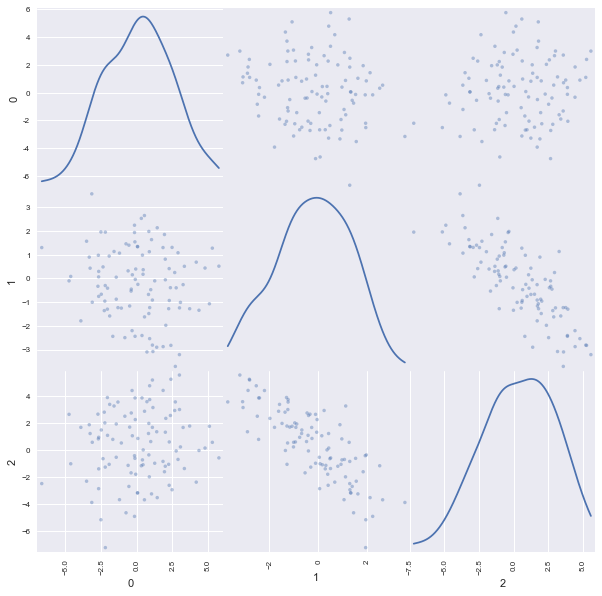

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.0891,0.993,0.89036
1,0,0.0372,0.9866,0.41022
2,0,0.0637,0.9877,0.48346


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 1)

Execution time: 0.009997129440307617 seconds


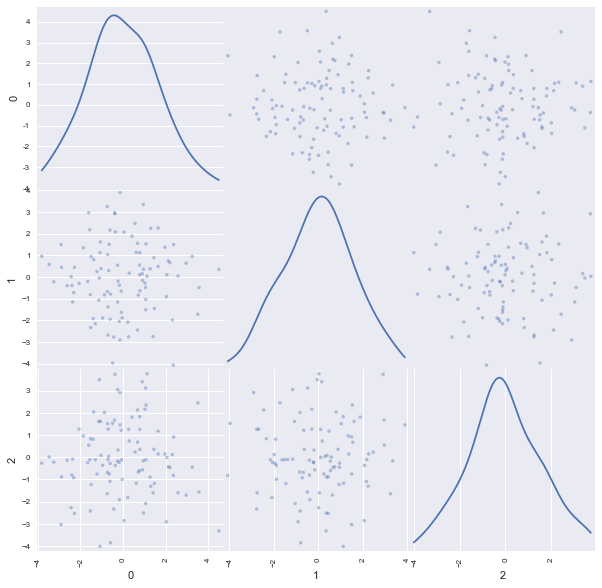

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.0572,0.9941,0.94457
1,0.0997,0.1931,0.9936,0.92135
2,0,0.1168,0.9884,0.53737


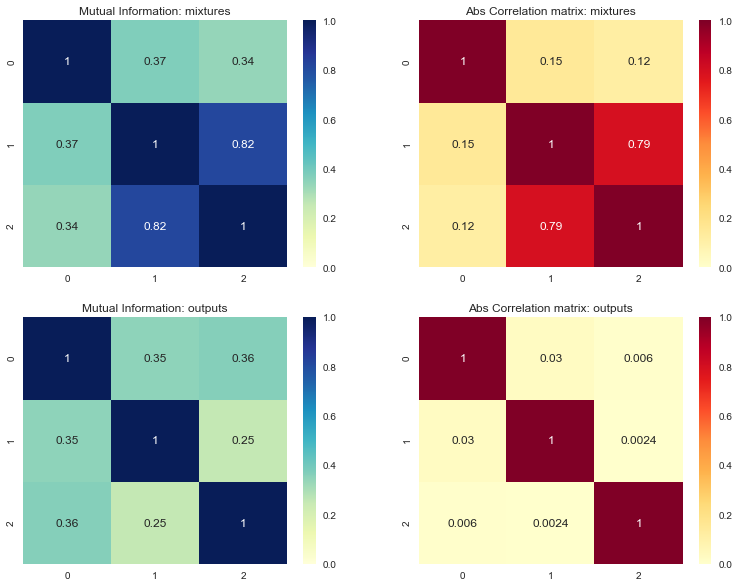

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1) 

Execution time: 0.00995779037475586 seconds


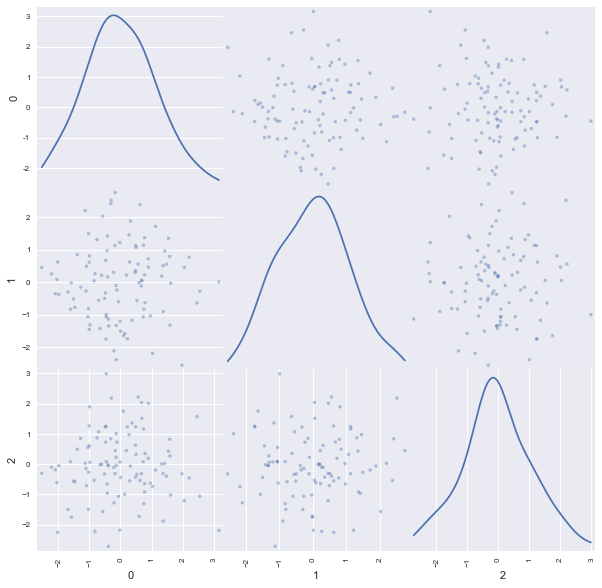

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.022,0.1084,0.9924,0.85047
1,0.0175,0.223,0.9923,0.84004
2,0.0467,0.1416,0.9903,0.68781


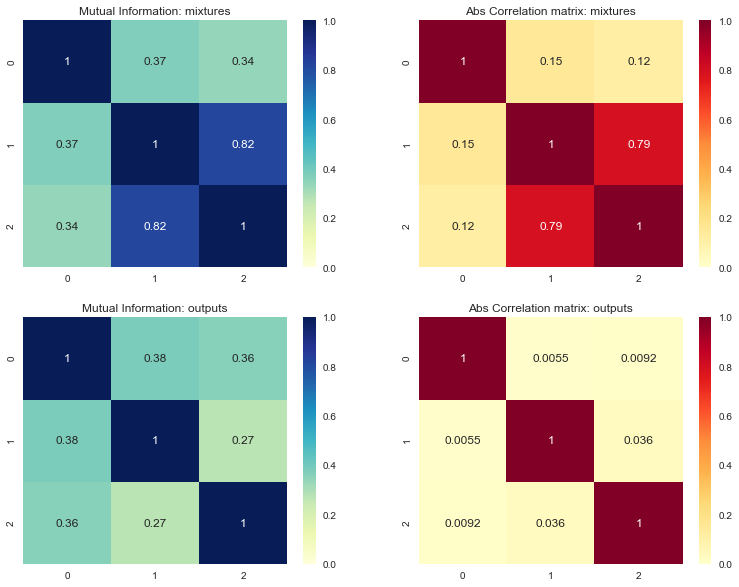

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, runs = 1)

Execution time: 0.00995945930480957 seconds


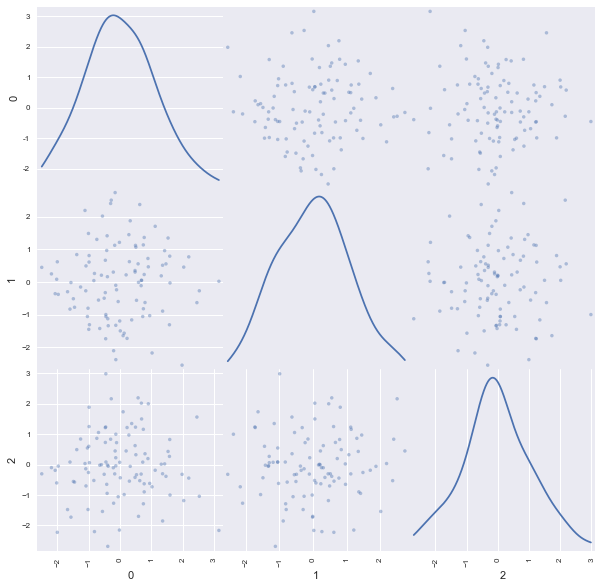

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.6366,0.9922,0.83205
1,0.014,0.058,0.9923,0.84577
2,0.0171,0.0837,0.9902,0.68381


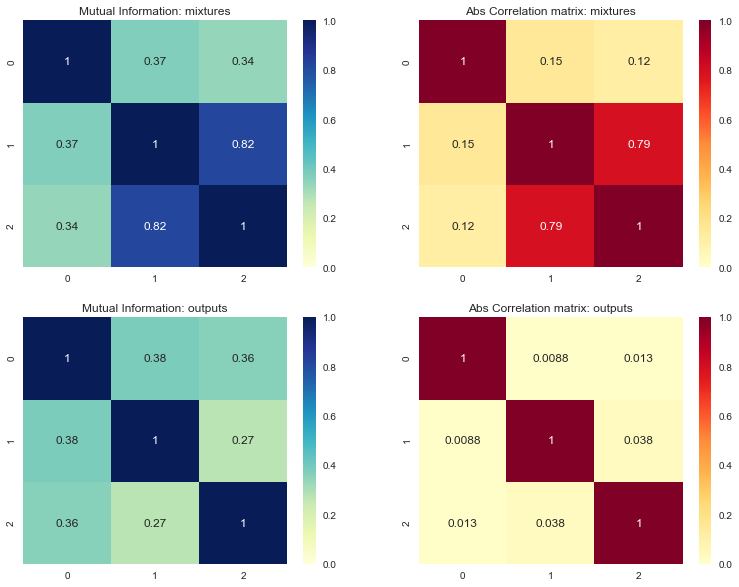

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

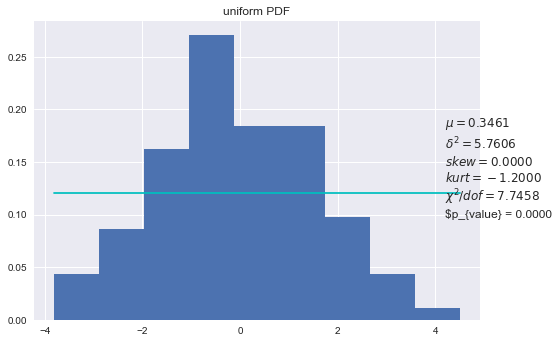

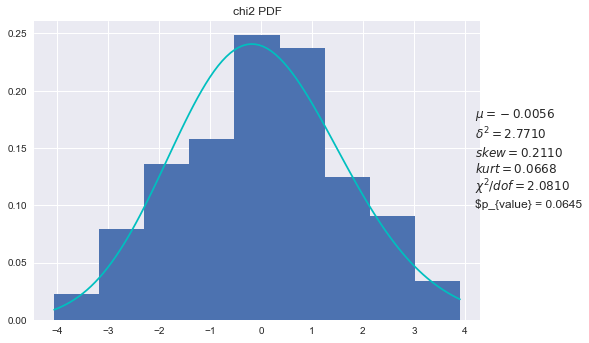

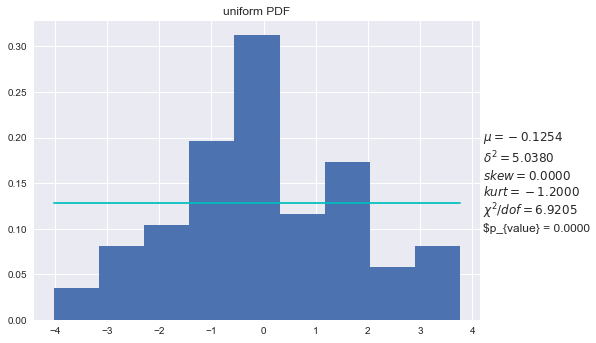

In [15]:
from evaluation import graph_fittedData
graph_fittedData(yNPCA[0])
graph_fittedData(yNPCA[1])
graph_fittedData(yNPCA[2])

## Chichocki-Unbehauen Algorithm Feedback network

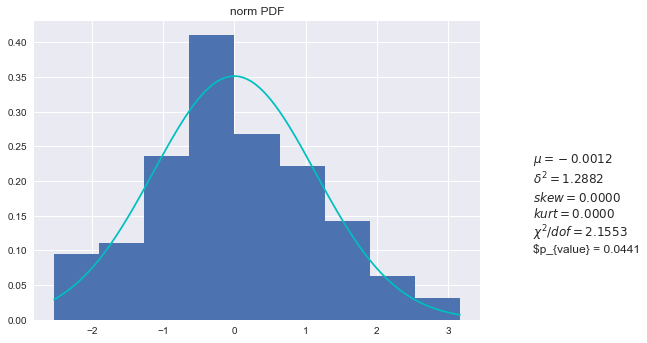

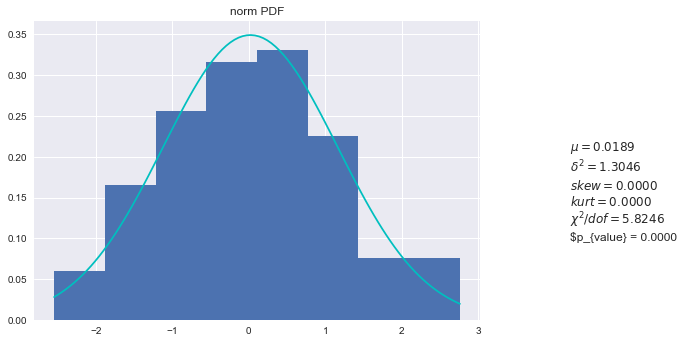

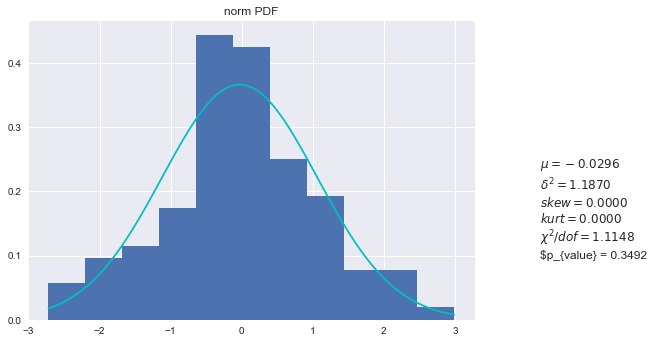

In [16]:
graph_fittedData(yFeedback[0])
graph_fittedData(yFeedback[1])
graph_fittedData(yFeedback[2])

## Chichocki-Unbehauen Algorithm Feedforward network

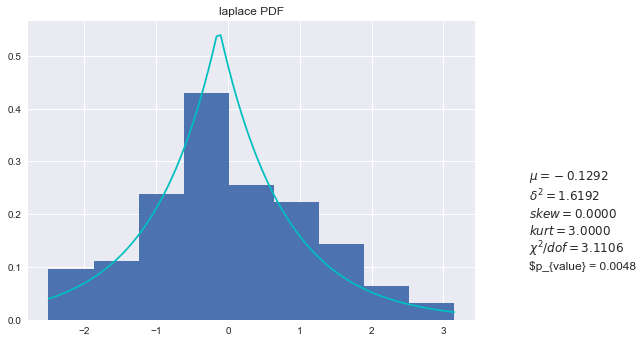

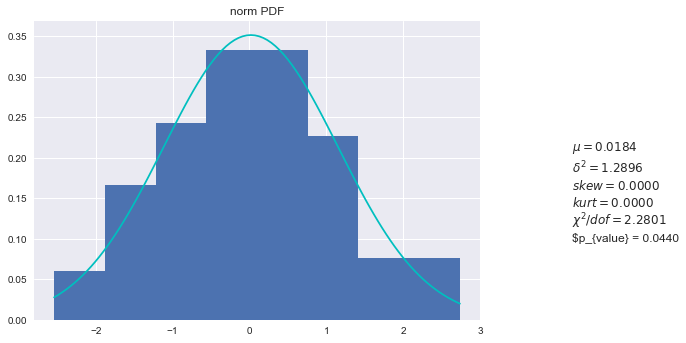

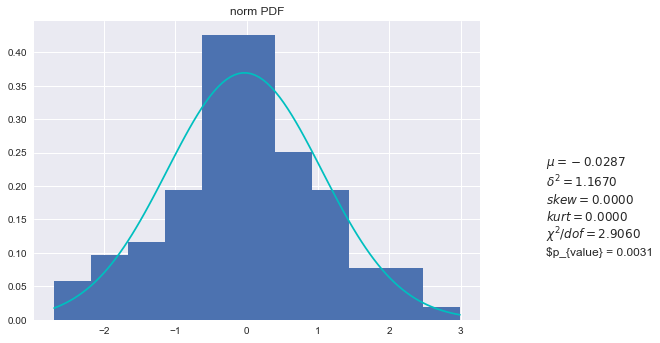

In [17]:
graph_fittedData(yFeedforward[0])
graph_fittedData(yFeedforward[1])
graph_fittedData(yFeedforward[2])

# Fontes conhecidas

In [18]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/SecondSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(3, 100)


,0,1,2
0,-1.930204,0.934960,-1.047224
1,-1.589633,1.128012,3.271487
2,0.538907,2.642640,-3.671368
3,1.258635,-0.108648,-0.965676
4,-1.077857,-1.256713,0.533529


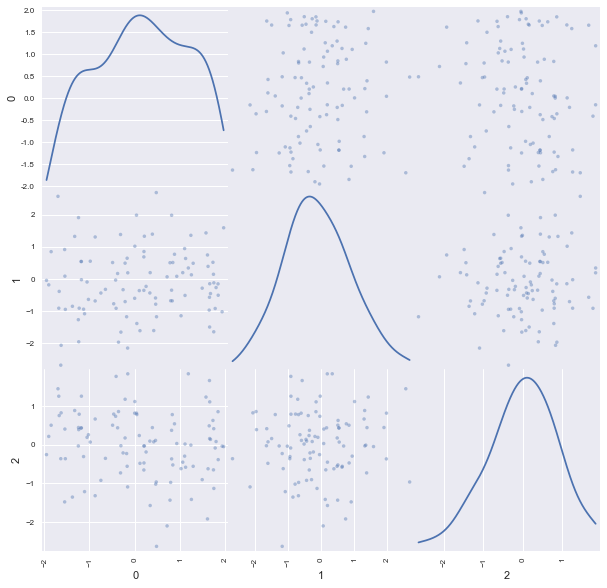

In [19]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(3, 100) (3, 100)
[[ 0.28982207  0.25174992  0.18869437]
 [ 0.01554601  0.03952497  0.09240537]
 [ 0.29151312  0.11118847  0.15562154]]


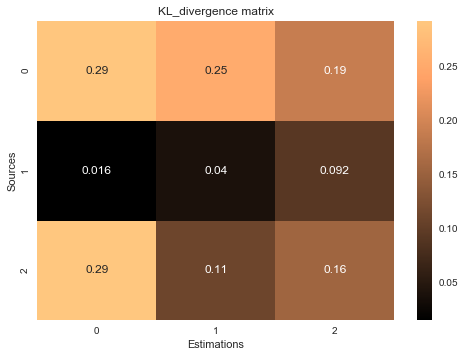

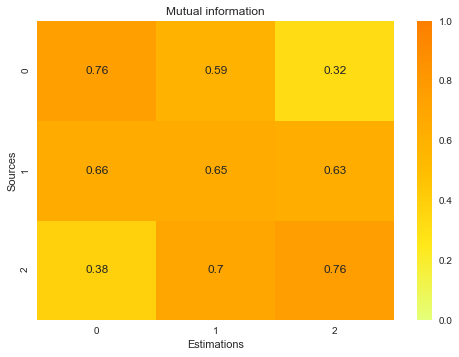

In [20]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(3, 100) (3, 100)
[[ 0.30036144  0.20780694  0.27760825]
 [ 0.0305758   0.03908372  0.07285682]
 [ 0.29426399  0.20302187  0.32522678]]


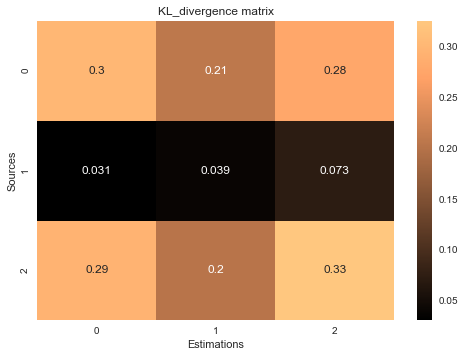

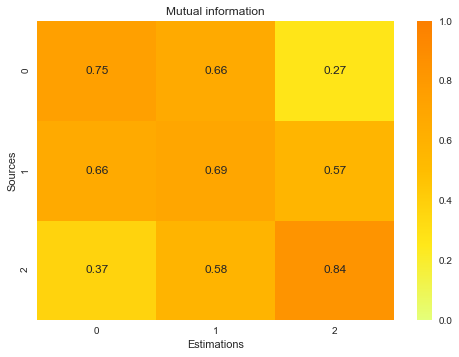

In [21]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(3, 100) (3, 100)
[[ 0.29352808  0.20780694  0.27853394]
 [ 0.03439785  0.03911345  0.06879648]
 [ 0.30261488  0.20317778  0.32444499]]


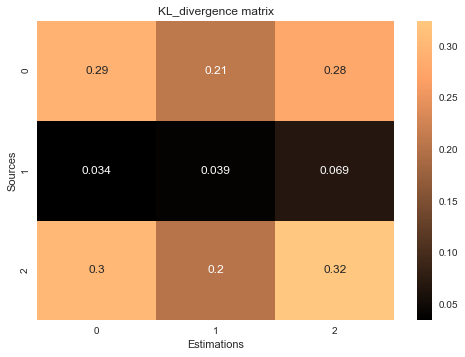

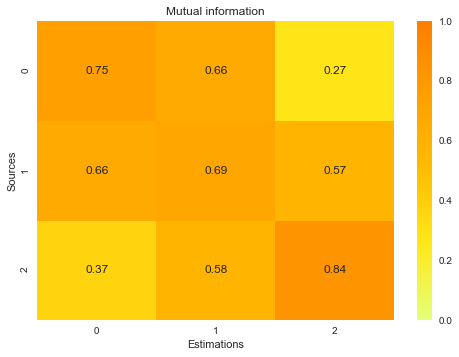

In [22]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)